In [4]:
import pandas as pd
import matplotlib.pyplot as plt
### Can change year
mydata = pd.read_csv('results\\2020\\draftdf_2020.csv')
mydata.head(6)

,Round,Pick_No,Team,Player,Player_Link,Pos,College,Conf
0,1,1,Cincinnati Bengals,Joe Burrow,https://en.wikipedia.org/wiki/Joe_Burrow,QB,LSU,SEC
1,1,2,Washington Redskins,Chase Young,https://en.wikipedia.org/wiki/Chase_Young,DE,Ohio State,Big Ten
2,1,3,Detroit Lions,Jeff Okudah,https://en.wikipedia.org/wiki/Jeff_Okudah,CB,Ohio State,Big Ten
3,1,4,New York Giants,Andrew Thomas,https://en.wikipedia.org/wiki/Andrew_Thomas_(A...,OT,Georgia,SEC
4,1,5,Miami Dolphins,Tua Tagovailoa,https://en.wikipedia.org/wiki/Tua_Tagovailoa,QB,Alabama,SEC
5,1,6,Los Angeles Chargers,Justin Herbert,https://en.wikipedia.org/wiki/Justin_Herbert,QB,Oregon,Pac12


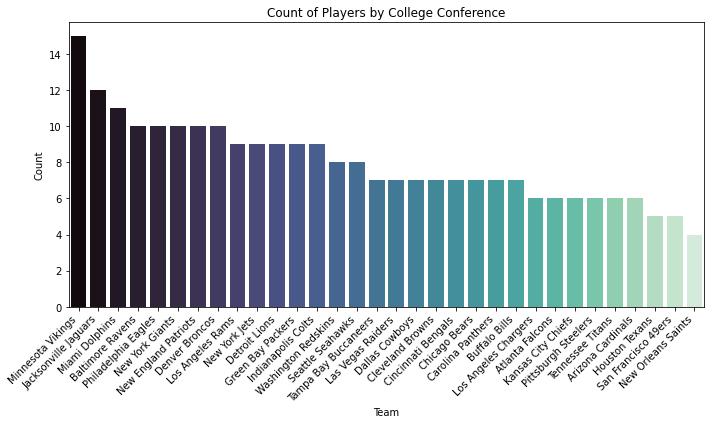

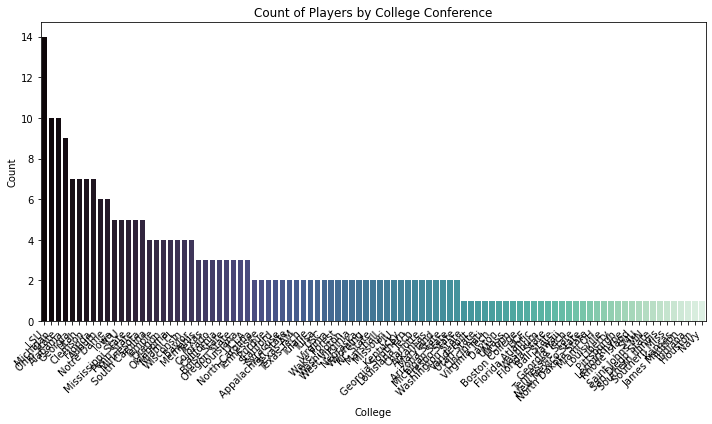

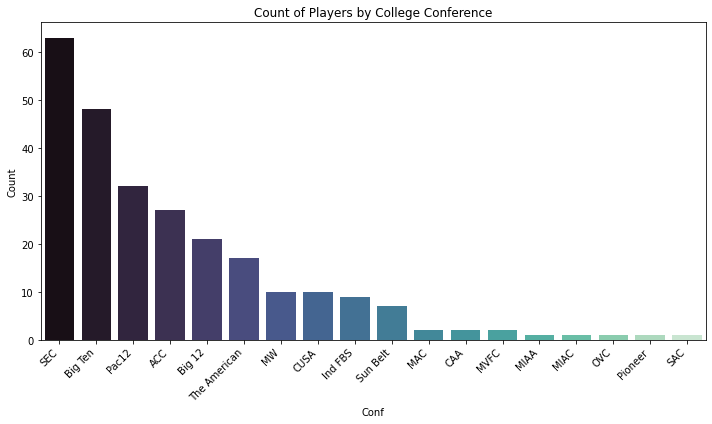

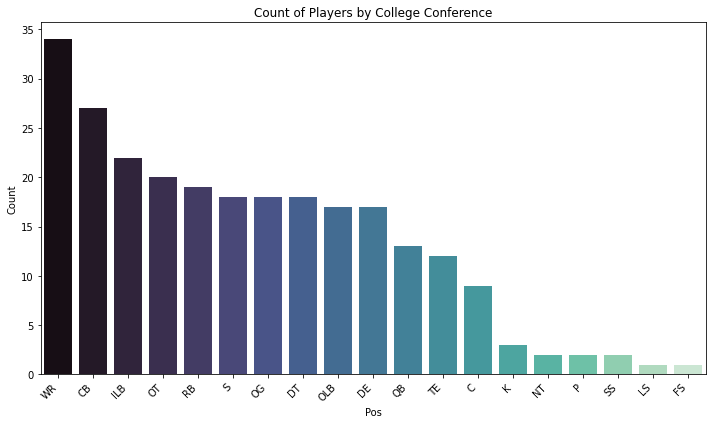

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
agg_col_list = ['Team', 'College', 'Conf', 'Pos']
for col in agg_col_list:
    CountByConf = mydata.groupby(col)['Player'].count().sort_values(ascending=False)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6)) 
    sns.barplot(x=CountByConf.index, y=CountByConf.values, palette='mako')
    plt.title('Count of Players by College Conference')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


In [1]:
import pandas as pd
import plotly.graph_objects as go 
import plotly.express as px

years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
total_df = pd.DataFrame(columns=['Round', 'Pick_No', 'Team', 'Player', 'Player_Link', 'Pos', 'College', 'Conf', 'ID'])
for year in years:
    cur_df = pd.read_csv("results/" + year + "/draftdf_" + year + ".csv")
    total_df = pd.concat([total_df, cur_df])

major_conf = ['SEC', 'ACC', 'Big Ten', 'Big 12', 'Pac12']

team_changes = {'St Louis Rams' : 'Los Angeles Rams', 'Oakland Raiders' : 'Las Vegas Raiders', 'San Diego Chargers' : 'Los Angeles Chargers', 
    'Washington Redskins' : 'Washington Commanders', 'Washington Football Team' : 'Washington Commanders'}

team_div = {}
for key in ['New England Patriots', 'New York Jets', 'Miami Dolphins', 'Buffalo Bills']:
    team_div[key] = 'AFC East'
for key in ['Baltimore Ravens', 'Cleveland Browns', 'Pittsburgh Steelers', 'Cincinnati Bengals']:
    team_div[key] = 'AFC North'
for key in ['Houston Texans', 'Jacksonville Jaguars', 'Indianapolis Colts', 'Tennessee Titans']:
    team_div[key] = 'AFC South'
for key in ['Kansas City Chiefs', 'Las Vegas Raiders', 'Denver Broncos', 'Los Angeles Chargers']:
    team_div[key] = 'AFC West'
for key in ['Dallas Cowboys', 'Philadelphia Eagles', 'New York Giants', 'Washington Commanders']:
    team_div[key] = 'NFC East'
for key in ['Detroit Lions', 'Chicago Bears', 'Green Bay Packers', 'Minnesota Vikings']:
    team_div[key] = 'NFC North'
for key in ['Tampa Bay Buccaneers', 'New Orleans Saints', 'Atlanta Falcons', 'Carolina Panthers']:
    team_div[key] = 'NFC South'
for key in ['San Francisco 49ers', 'Seattle Seahawks', 'Los Angeles Rams', 'Arizona Cardinals']:
    team_div[key] = 'NFC West'

total_df['Conf_Clean'] = 'blank'
total_df['Div'] = 'blank'
for index, row in total_df.iterrows():

    if row['Conf'] not in major_conf:
        total_df.at[index, 'Conf_Clean'] = 'Other'
    else:
        total_df.at[index, 'Conf_Clean'] = row['Conf']

    team_val = team_changes.get(row['Team'], 'None')
   
    if team_val != 'None':
        total_df.at[index, 'Team'] = team_val
        div_val = team_div.get(team_val)
        if div_val:
            total_df.at[index, 'Div'] = div_val    
        else:
            print(row['Team'] + " not found in dict")

    else:
        div_val = team_div.get(row['Team'])
        total_df.at[index, 'Div'] = div_val

print(len(total_df))
print(len(total_df['ID'].unique()))

fig1 = px.parallel_categories(total_df, dimensions=['Round', 'Conf_Clean', 'Div'])

fig1.show()

c:\Users\14012\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2799
2799
